In [ ]:
pip install pandas pandas_datareader

In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf

# Descargar
aapl_data = yf.download("AAPL", start = "2020-01-01", end= "2023-12-31")

print(aapl_data.head())

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-02  74.059998  75.150002  73.797501  75.087502  73.152657  135480400
2020-01-03  74.287498  75.144997  74.125000  74.357498  72.441467  146322800
2020-01-06  73.447502  74.989998  73.187500  74.949997  73.018692  118387200
2020-01-07  74.959999  75.224998  74.370003  74.597504  72.675270  108872000
2020-01-08  74.290001  76.110001  74.290001  75.797501  73.844353  132079200


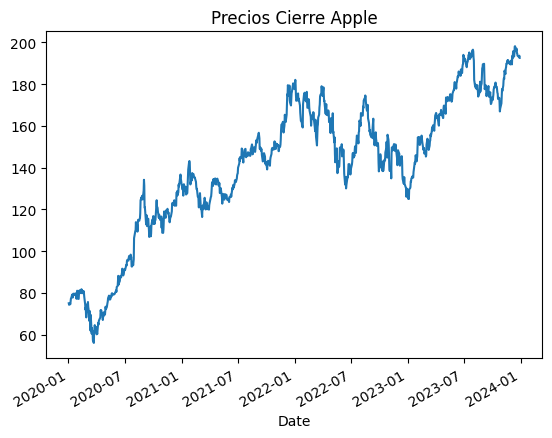

In [ ]:
import matplotlib.pyplot as plt
close_prices=aapl_data["Close"]
close_prices.plot()
plt.title("Precios Cierre Apple")
plt.show()

In [ ]:
# EL grafico muestra una serie no estacioanaria (Tiene Tendencia)
# Realizamos el test Dickey-Fuller
from statsmodels.tsa.stattools import adfuller

test = adfuller(close_prices.dropna())

print("ADF : %f" % test[0])
print("p-value: %f" % test[1])

if test[1]>0.05:
  print("La serie es no estacionaria(tiene tendencia)")

else:
  print("La serie es estacionaria(no tiene tendencia)")

ADF : -1.555344
p-value: 0.505978
La serie es no estacionaria(tiene tendencia)


In [ ]:
# Hallamos la primera diferencia de la serie
ydiff = close_prices.diff().dropna()

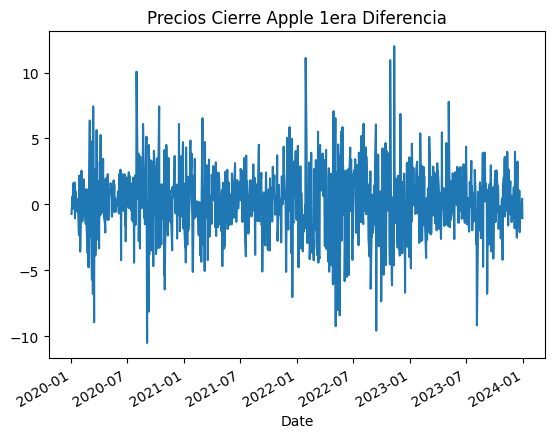

In [ ]:
#Gráfico
ydiff.plot()
plt.title("Precios Cierre Apple 1era Diferencia")
plt.show()

In [ ]:
test_diff = adfuller(ydiff.dropna())

print("ADF : %f" % test_diff[0])
print("p-value: %f" % test_diff[1])

if test_diff[1]>0.05:
  print("La serie es no estacionaria(tiene tendencia)")

else:
  print("La serie es estacionaria(no tiene tendencia)")

ADF : -33.004757
p-value: 0.000000
La serie es estacionaria(no tiene tendencia)


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

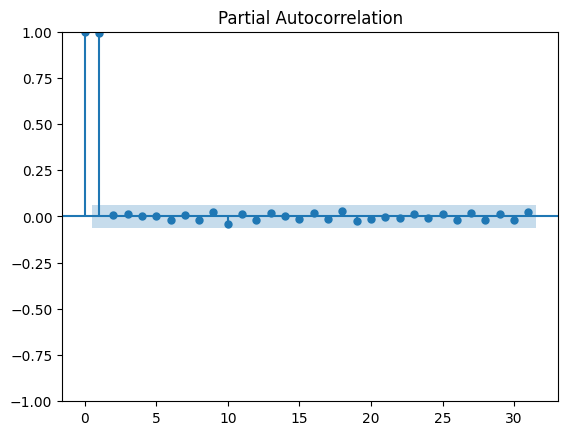

In [ ]:
# Graficar la autocorrelacion parcial AR
plot_pacf(close_prices.dropna())
plt.show()

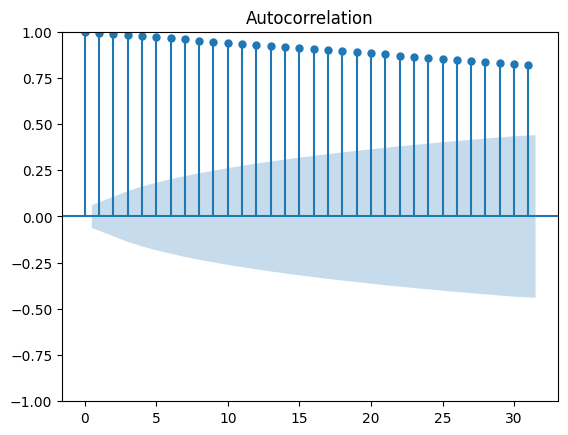

In [ ]:
# Graficar la autocorrelacion total MA
plot_acf(close_prices.dropna())
plt.show()

In [ ]:
import warnings
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import numpy as np
# Ignorar advertencias
warnings.filterwarnings("ignore")

# Generamos la funci´øn óptima (Orden de integración )
def optimal_d(series):
  d=0
  p_value=adfuller(series)[1]
  while p_value > 0.05:
    d += 1
    p_value=adfuller(np.diff(series,n=d))[1]
  return d

d_optimal = optimal_d(close_prices)

# Función para evaluar AR I y MA

def evaluar_modelo(dataset,p_values, d , q_values):
  dataset = dataset.astype("float32")
  best_score, best_cf = float("inf"), None
  for p in p_values:
    for q in q_values:
      order = (p,d,q)
      try:
        model = ARIMA(dataset,order=order)
        model_fit = model.fit()
        aic = model_fit.aic
        if aic < best_score:
          best_score, best_cf= aic, order
        print("ARIMA%s AIC%.3f" % (order,aic))
      except:
        continue
  print("Mejor Modelo: ARIMA%s AIC%.3f" % (best_cf, best_score))
  return best_cf

# Rangos de p q
p_values = range(0,4)
q_values = range(0,4)

# Llamamos a la función

best_order = evaluar_modelo(close_prices,p_values,d_optimal,q_values)
print(f"Los valores optimos son:  p= {best_order[0]}, d={best_order[1]} , q={best_order[2]}")


ARIMA(0, 1, 0) AIC4811.269
ARIMA(0, 1, 1) AIC4811.611
ARIMA(0, 1, 2) AIC4813.146
ARIMA(0, 1, 3) AIC4815.040
ARIMA(1, 1, 0) AIC4811.683
ARIMA(1, 1, 1) AIC4813.129
ARIMA(1, 1, 2) AIC4815.080
ARIMA(1, 1, 3) AIC4813.549
ARIMA(2, 1, 0) AIC4813.193
ARIMA(2, 1, 1) AIC4815.076
ARIMA(2, 1, 2) AIC4817.092
ARIMA(2, 1, 3) AIC4813.260
ARIMA(3, 1, 0) AIC4815.023
ARIMA(3, 1, 1) AIC4817.014
ARIMA(3, 1, 2) AIC4813.354
ARIMA(3, 1, 3) AIC4819.294
Mejor Modelo: ARIMA(0, 1, 0) AIC4811.269
Los valores optimos son:  p= 0, d=1 , q=0
